In [1]:
#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
from scipy.spatial.distance import cdist
from scipy import signal
import math
import copy


#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc
import cairosvg
import itertools
import time
np.set_printoptions(suppress=True)

FS=7

In [2]:
dir='/home/gadfly/DataAnalysis/data/'
df=pd.read_hdf(dir+'DesertDataOct/Run4.h5')
dff=pd.read_hdf(dir+'Forest0707/Sprint02.h5')
df['new_alt']=df.alt-np.mean(df.alt)
dff['new_alt']=dff.alt-np.mean(dff.alt)

In [3]:
t=[]
for i in range(len(dff)):
    t.append(dff.master_time[i]-dff.master_time[0])
    
dff['time']=t

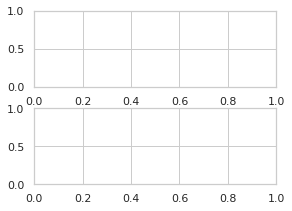

In [20]:
layout = fifi.svg_to_axes.FigureLayout('../../../../Figure/verticalMovement.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [21]:
ax=layout.axes[('fig','ax1')]
ax.grid(False)
line_width=0.5
marker_size=0.5

ax.plot(df.time,df.new_alt,linewidth=line_width,markersize=marker_size*2,rasterized= True)
# ax.set_xlim(200,800)
ax.set_ylim(-0.5,0.5)

ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left':4,'bottom':4},
                            smart_bounds=True,
                            yticks=[-0.5,0.5],
#                             xticks=[200,800],
                            linewidth=0.5)

ax.set_xticklabels([])
ax.set_ylabel('Sensor\nz-direction, m')
ax.yaxis.set_label_coords(-0.04, 0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig'], 'fig', cleartarget=True)
layout.write_svg('../../../../Figure/verticalMovement.svg')

In [22]:
ax=layout.axes[('fig','ax2')]
ax.grid(False)
line_width=0.5
marker_size=0.5

ax.plot(df.time,df.W,linewidth=line_width,markersize=marker_size*2,rasterized= True)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left':4,'bottom':4},
                            smart_bounds=True,
                            yticks=[-0.6,0.6],
                            xticks=[0,1700],
                            linewidth=0.5)

# ax.set_xticklabels([])
ax.set_xlabel('Time, s')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_ylabel('Ambient Wind\n Speed, m/s')
ax.yaxis.set_label_coords(-0.04, 0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig'], 'fig', cleartarget=True)
layout.write_svg('../../../../Figure/verticalMovement.svg')

### Forest Data

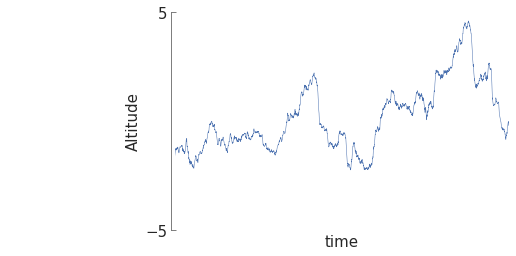

In [6]:
f,ax=plt.subplots(1,1)
ax.grid(False)
line_width=0.5
marker_size=0.5

ax.plot(dff.time,dff.new_alt,linewidth=line_width,markersize=marker_size*2,rasterized= True)
ax.set_xlim(500,1100)
ax.set_ylim(-5,5)
# ax.axhline(y=0, color='r', linestyle='--',linewidth=line_width,markersize=marker_size*2)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left':4,'bottom':4},
                            smart_bounds=True,
                            yticks=[-5,5],
                            xticks=[200,800],
                            linewidth=0.5)

ax.set_xticklabels([])
# ax.set_ylabel('Sensor\nz-direction, m')
# ax.yaxis.set_label_coords(-0.04, 0.5)
ax.set_xlabel('time')
ax.set_ylabel('Altitude')
figurefirst.mpl_functions.set_fontsize(ax, 15)


In [47]:
ax=layout.axes[('fig','ax3')]
ax.grid(False)
line_width=0.5
marker_size=0.5

ax.plot(dff.time,dff.new_alt,linewidth=line_width,markersize=marker_size*2,rasterized= True)
ax.set_xlim(500,1100)
ax.set_ylim(-5,5)
# ax.axhline(y=0, color='r', linestyle='--',linewidth=line_width,markersize=marker_size*2)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left':4,'bottom':4},
                            smart_bounds=True,
                            yticks=[-5,5],
                            xticks=[200,800],
                            linewidth=0.5)

ax.set_xticklabels([])
# ax.set_ylabel('Sensor\nz-direction, m')
# ax.yaxis.set_label_coords(-0.04, 0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig'], 'fig', cleartarget=True)
layout.write_svg('../../../../Figure/verticalMovement.svg')

In [48]:
ax=layout.axes[('fig','ax4')]
ax.grid(False)
line_width=0.5
marker_size=0.5

ax.plot(dff.time,dff.W,linewidth=line_width,markersize=marker_size*2,rasterized= True)
ax.set_xlim(500,1100)

ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left':4,'bottom':4},
                            smart_bounds=True,
                            yticks=[-0.8,0.8],
                            xticks=[500,1100],
                            linewidth=0.5)

ax.set_xticklabels([])
ax.set_xlabel('600 secs')
ax.xaxis.set_label_coords(0.5, -0.1)
# ax.set_ylabel('Ambient Wind\n Speed W, m/s')
# ax.yaxis.set_label_coords(-0.04, 0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig'], 'fig', cleartarget=True)
layout.write_svg('../../../../Figure/verticalMovement.svg')